In [2]:
import numpy as np

In [5]:
t = np.linspace(0,5, 44100)

In [14]:
x = np.sin(2*np.pi*440*t)
fs = 44100

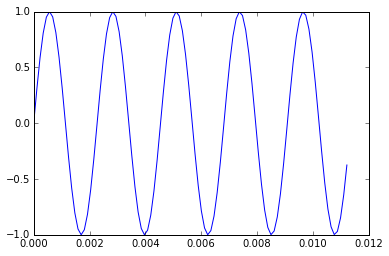

In [36]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(t[0:100], x[0:100])
plt.show()

In [27]:
import scipy.io.wavfile
scipy.io.wavfile.write('test.wav',
                    fs, 
                    np.int16(x/max(np.abs(x))*32767))

In [40]:
!!aplay test.wav

["Playing WAVE 'test.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [37]:
x = np.sin(2*np.pi*220*t)

In [38]:
import scipy.io.wavfile
scipy.io.wavfile.write('test2.wav',
                    fs, 
                    np.int16(x/max(np.abs(x))*32767))

In [41]:
!!aplay test2.wav

["Playing WAVE 'test2.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [45]:
t = np.linspace(0,1, 44100)


In [59]:
x1 =  np.sin(2*np.pi*440*t)
x2 =  np.sin(2*np.pi*440*t* 1.0595**3)
x3 =  np.sin(2*np.pi*440*t* 1.0595**7)
x = np.r_[x1, x2, x3]


In [70]:
scipy.io.wavfile.write('test3.wav',
                    fs*3, 
                    np.int16(x/max(np.abs(x))*32767))
!!aplay test3.wav

["Playing WAVE 'test3.wav' : Signed 16 bit Little Endian, Rate 132300 Hz, Mono"]

In [69]:
y =x1 + x2 +x3
scipy.io.wavfile.write('test4.wav',
                    fs*3, 
                    np.int16(y/max(np.abs(y))*32767))
!!aplay test4.wav

["Playing WAVE 'test4.wav' : Signed 16 bit Little Endian, Rate 132300 Hz, Mono"]

In [71]:
y = np.sign(x)
scipy.io.wavfile.write('test5.wav',
                    fs*3, 
                    np.int16(y/max(np.abs(y))*32767))
!!aplay test5.wav

["Playing WAVE 'test5.wav' : Signed 16 bit Little Endian, Rate 132300 Hz, Mono"]

In [72]:
y = np.r_[x, y]
scipy.io.wavfile.write('test6.wav',
                    fs*3, 
                    np.int16(y/max(np.abs(y))*32767))
!!aplay test6.wav

["Playing WAVE 'test6.wav' : Signed 16 bit Little Endian, Rate 132300 Hz, Mono"]

In [78]:
from scipy import signal
z = scipy.signal.sawtooth(2*np.pi*440*t)

In [84]:
scipy.io.wavfile.write('test7.wav',
                    fs, 
                    np.int16(z/max(np.abs(z))*32767))
!!aplay test7.wav

["Playing WAVE 'test7.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [159]:
def dzwiek(f, t, a, d):
    """
    """
    T = np.linspace(0,t, 44100)
    x =  np.sin(2*np.pi*440*T)
    # x = np.sign(x)
    n = np.floor(len(x)*a)
    l = np.linspace(0,1, n)
    x[:n] = x[:n]*l
    m = np.floor(len(x)*d)
    l2 = np.linspace(1,0, m)
    x[(len(x)-m):] = x[(len(x)-m):]*l2
    return x

In [166]:
z = dzwiek(440, 8, 0.3, 0.3)
scipy.io.wavfile.write('test8.wav',
                fs, 
                np.int16(z/max(np.abs(z))*32767))
!!aplay test8.wav


["Playing WAVE 'test8.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

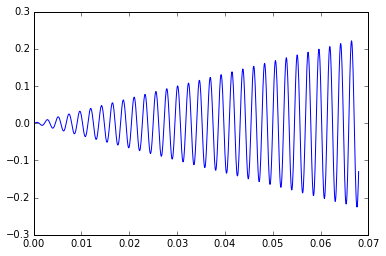

In [123]:
t =np.linspace(0,3, 44100)
plt.plot(t[1:1000] ,z[1:1000])
plt.show()


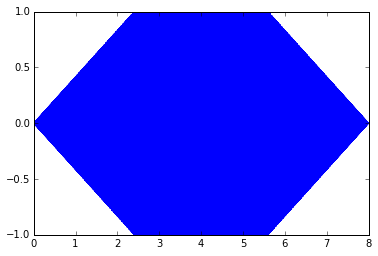

In [168]:
t =np.linspace(0,8, 44100)
plt.plot(t ,z)
plt.show()

In [3]:
f = 440
T = 0.5
fs = 44100
t = np.linspace(0, T, T*fs)
#G
f1 = 784
y1 = np.sin(2*np.pi*f1*t)

#E,E
f2 = f1*(1.0545454545454545)**(-3)
y2 = np.sin(2*np.pi*f2*t)

#F
f3 = f1*(1.0545454545454545)**(-2)
y3 = np.sin(2*np.pi*f3*t)

#D,D
f4 = f1*(1.0545454545454545)**(-5)
y4 = np.sin(2*np.pi*f4*t)

#C
f5 = f1*(1.0545454545454545)**(-7)
y5 = np.sin(2*np.pi*f3*t)

#E
f6 = f1*(1.0545454545454545)**(-3)
y6 = np.sin(2*np.pi*f6*t)

#G
y7 = np.sin(2*np.pi*f1*t)

#pauza:
f0 = 0
T0 = 0.05
t0 = np.linspace(f0, T0, T0*fs)
p = np.sin(2*np.pi*f0*t0)


y = np.r_[y1, y2, y2, p,  y3, y4, y4, p, y5, y2, y1]


import scipy.io.wavfile
scipy.io.wavfile.write('test8.wav', fs, np.int16(y/max(np.abs(y))*32767)) 
# !!aplay test8.wav

In [172]:
z = dzwiek(440, 1, 0, 0)
scipy.io.wavfile.write('test.wav',
                    fs, 
                    np.int16(z/max(np.abs(z))*32767))
!!aplay test.wav

["Playing WAVE 'test.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

/opt/anaconda/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


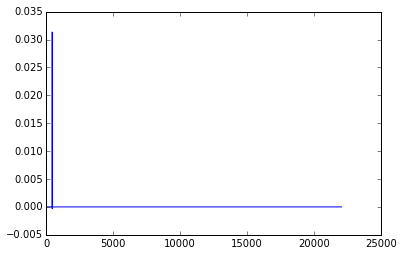

In [184]:
y = dzwiek(440, 1, 0, 0)

import scipy.fftpack
yf = scipy.fftpack.fft(y)
n = y.size
xf = np.linspace(0, 44100/2, n/2)
plt.plot(xf, 2*(yf[1:int(n/2)+1])/n)
plt.show()

In [185]:
!!aplay Electronic-Kick-1.wav

["Playing raw data 'Electronic-Kick-1.wav' : Unsigned 8 bit, Rate 8000 Hz, Mono"]

In [206]:
fs,y = scipy.io.wavfile.read('Electronic-Kick-1.wav')
print(fs)
y = np.mean(y, axis=1)
y /= 32767

ValueError: Not a WAV file.

In [243]:
fs,y = scipy.io.wavfile.read('Snare-Drum-1 (1).wav')
fs2,y2 = scipy.io.wavfile.read('Snare-Drum-4 (1).wav')

y = np.mean(y, axis = 1)
y2 = np.mean(y2, axis = 1)
n1 =  len(y)
n2 = len(y2)
pp = np.zeros((n1 + n2)*3)
pp[:n1] = y
pp[n1:n1+n2] = y2
pp[n1+n2:n1+n2+n1] = y
pp[2*(n1+n2):2*(n1+n2)+n2] = y2

scipy.io.wavfile.write('tes11.wav',
                    fs, 
                    np.int16(pp/max(np.abs(pp))*32767))
!!aplay test11.wav

['test11.wav: No such file or directory']

In [256]:
import scipy.ndimage
y = scipy.ndimage.imread('Legia_Warszawa.png')
y.shape

(1023, 806, 4)

In [257]:
y /= 255

In [258]:
y = np.mean(y, axis= 2) 


In [259]:
y.shape

(1023, 806)

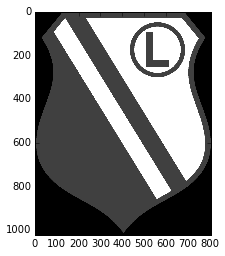

In [262]:
plt.imshow(y, cmap = plt.cm.gray)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


<function matplotlib.pyplot.show>

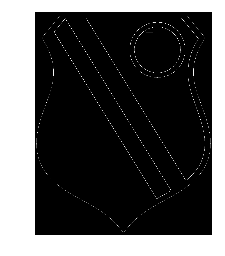

In [270]:
a = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])
print(a)
import scipy.signal
y2 = scipy.signal.convolve2d(y, a)
y2[y2 > 0.5] = 1
y2[y2 < 0.5] = 0
plt.imshow(y2, cmap = plt.cm.gray)
plt.axis('off')
plt.show

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


<function matplotlib.pyplot.show>

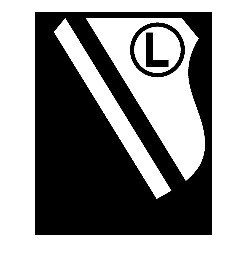

In [271]:
a = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])
print(a)
import scipy.signal
y2 = scipy.signal.convolve2d(y, a)
y2[y2 > 0.5] = 1
y2[y2 < 0.5] = 0
plt.imshow(y2, cmap = plt.cm.gray)
plt.axis('off')
plt.show